<a href="https://colab.research.google.com/github/aniketmodi-work/AI-NMIMS/blob/master/CS50/Neural%20Network/Traffic_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Project by: Aniket Modi, J064

### About the Project

As research continues in the development of self-driving cars, one of the key challenges is computer vision, allowing these cars to develop an understanding of their environment from digital images. In particular, this involves the ability to recognize and distinguish road signs – stop signs, speed limit signs, yield signs, and more.

In this project, you’ll use TensorFlow to build a neural network to classify road signs based on an image of those signs. To do so, you’ll need a labeled dataset: a collection of images that have already been categorized by the road sign represented in them.

Several such data sets exist, but for this project, we’ll use the German Traffic Sign Recognition Benchmark (GTSRB) dataset, which contains thousands of images of 43 different kinds of road signs.

### Image collection and Preprocessing

Importing necessary libraries

In [2]:
import tensorflow as tf
import keras
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn
from PIL import Image

gtsrb.zip is uploaded and is being unzipped onto using Python

In [ ]:
# !unzip "/content/drive/My Drive/DATASETS/gtsrb.zip" -d "/content/drive/My Drive/DATASETS"

In [3]:
import glob

List of all folders available inside

In [4]:
folders = glob.glob('/content/drive/My Drive/DATASETS/gtsrb/*')
folders

['/content/drive/My Drive/DATASETS/gtsrb/2',
 '/content/drive/My Drive/DATASETS/gtsrb/22',
 '/content/drive/My Drive/DATASETS/gtsrb/5',
 '/content/drive/My Drive/DATASETS/gtsrb/25',
 '/content/drive/My Drive/DATASETS/gtsrb/12',
 '/content/drive/My Drive/DATASETS/gtsrb/40',
 '/content/drive/My Drive/DATASETS/gtsrb/14',
 '/content/drive/My Drive/DATASETS/gtsrb/13',
 '/content/drive/My Drive/DATASETS/gtsrb/32',
 '/content/drive/My Drive/DATASETS/gtsrb/35',
 '/content/drive/My Drive/DATASETS/gtsrb/34',
 '/content/drive/My Drive/DATASETS/gtsrb/33',
 '/content/drive/My Drive/DATASETS/gtsrb/20',
 '/content/drive/My Drive/DATASETS/gtsrb/18',
 '/content/drive/My Drive/DATASETS/gtsrb/27',
 '/content/drive/My Drive/DATASETS/gtsrb/9',
 '/content/drive/My Drive/DATASETS/gtsrb/0',
 '/content/drive/My Drive/DATASETS/gtsrb/11',
 '/content/drive/My Drive/DATASETS/gtsrb/7',
 '/content/drive/My Drive/DATASETS/gtsrb/29',
 '/content/drive/My Drive/DATASETS/gtsrb/16',
 '/content/drive/My Drive/DATASETS/gtsr

In [5]:
labels = []
files_path = []
for path in folders:

    current_list = glob.glob(path + '/*')
    a = path
    for i in range(len(current_list)):
        
        labels.append(int(a.replace('/content/drive/My Drive/DATASETS/gtsrb/', '')))
        files_path.append(current_list[i])

len(files_path)

26640

Number of classes and their respective sizes

In [6]:
pd.DataFrame(labels)[0].value_counts()

1     1500
2     1500
13    1440
12    1410
38    1380
10    1350
4     1320
5     1260
25    1020
9      990
7      960
8      960
3      960
11     900
35     810
18     810
17     750
31     540
14     540
33     480
26     420
15     420
28     360
23     360
6      300
16     300
30     300
34     300
22     270
36     270
21     240
20     240
40     240
39     210
29     180
32     180
24     180
27     180
42     180
41     180
19     150
37     150
0      150
Name: 0, dtype: int64

Opening and storing all images inside a list

In [ ]:
images = []
for path in files_path:
    images.append(Image.open(path))
len(images)

Returning lowest sized image

In [ ]:
h = []
w = []
for i in range(len(images)):
    h.append(images[i].size[0])
    w.append(images[i].size[1])
print(min(h))
print(min(w))

25
25


Resizing all the images to the size of the tiniest image

In [ ]:
images_resized = []
for i in range(len(images)):
    images_resized.append(images[i].resize((25,25)))
images_resized[0].size

(25, 25)

Storing all the images as numpy arrays

In [ ]:
x = []
for i in range(len(images_resized)):
    x.append(np.array(images_resized[i]))
x = np.array(x)
x.shape

(26640, 25, 25, 3)

In [ ]:
y = labels
y = np.array(y)
y.shape

(26640,)

Splitting into training and testing 40 percent

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test , y_train, y_test = train_test_split(x,y, test_size = 0.4)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(15984, 25, 25, 3)
(10656, 25, 25, 3)
(15984,)
(10656,)


### Model Building

In [ ]:
X_train.shape

(15984, 25, 25, 3)

In [ ]:
keras.utils.to_categorical(y_train).shape

In [ ]:
from keras import models
from keras import layers

Using Convolutional Neural Network with 2 Convolution layers + MaxPooling + 25 percent dropout and Dense layers

In [ ]:
nn = models.Sequential()

nn.add(layers.Conv2D(filters = 64,
                     kernel_size = (3,3),
                     activation = 'relu',
                     padding = 'same',
                     input_shape = (25,25,3)))

nn.add(layers.MaxPooling2D(pool_size = (2,2)))

nn.add(layers.Dropout(0.25))

nn.add(layers.Conv2D(filters = 64,
                     kernel_size = (3,3),
                     activation = 'relu',
                     padding = 'same'))

nn.add(layers.MaxPooling2D(pool_size = (2,2)))

nn.add(layers.Flatten())

nn.add(layers.Dense(units = 128,
                    activation = 'relu'))

nn.add(layers.Dense(units = 64,
                    activation = 'relu'))

nn.add(layers.Dense(units = 43,
                    activation = 'softmax'))

nn.summary()

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_16 (Conv2D)           (None, 25, 25, 64)        1792      
_________________________________________________________________
max_pooling2d_16 (MaxPooling (None, 12, 12, 64)        0         
_________________________________________________________________
dropout_19 (Dropout)         (None, 12, 12, 64)        0         
_________________________________________________________________
conv2d_17 (Conv2D)           (None, 12, 12, 64)        36928     
_________________________________________________________________
max_pooling2d_17 (MaxPooling (None, 6, 6, 64)          0         
_________________________________________________________________
flatten_7 (Flatten)          (None, 2304)              0         
_________________________________________________________________
dense_21 (Dense)             (None, 128)              

### Model Compilation

In [ ]:
nn.compile(optimizer = 'adam',
           loss = 'categorical_crossentropy',
           metrics = ['accuracy'])

history = nn.fit(x = X_train,
                 y = keras.utils.to_categorical(y_train),
                 epochs = 50,
                 validation_data = (X_test, keras.utils.to_categorical(y_test)))

Epoch 1/50
500/500 [==============================] - 2s 5ms/step - loss: 2.7838 - accuracy: 0.3052 - val_loss: 1.4274 - val_accuracy: 0.5249
Epoch 2/50
500/500 [==============================] - 2s 4ms/step - loss: 1.1665 - accuracy: 0.6164 - val_loss: 0.8556 - val_accuracy: 0.7272
Epoch 3/50
500/500 [==============================] - 2s 4ms/step - loss: 0.7347 - accuracy: 0.7626 - val_loss: 0.5292 - val_accuracy: 0.8367
Epoch 4/50
500/500 [==============================] - 2s 4ms/step - loss: 0.5022 - accuracy: 0.8390 - val_loss: 0.3589 - val_accuracy: 0.8982
Epoch 5/50
500/500 [==============================] - 2s 4ms/step - loss: 0.3754 - accuracy: 0.8828 - val_loss: 0.2693 - val_accuracy: 0.9200
Epoch 6/50
500/500 [==============================] - 2s 4ms/step - loss: 0.2948 - accuracy: 0.9084 - val_loss: 0.3003 - val_accuracy: 0.9127
Epoch 7/50
500/500 [==============================] - 2s 4ms/step - loss: 0.2233 - accuracy: 0.9293 - val_loss: 0.1877 - val_accuracy: 0.9488
Epoch 

No handles with labels found to put in legend.


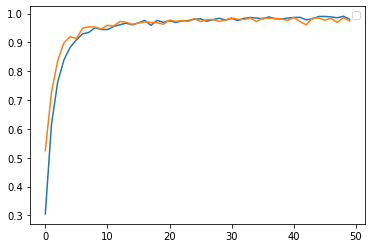

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.legend(loc = 'best')

In [ ]:
y_pred = nn.predict_classes(X_test)
sklearn.metrics.confusion_matrix(y_pred, y_test)

In [ ]:
print('Training Accuracy at 49 epochs: ', history.history['accuracy'][-2] * 100, '%')
print('Testing Accuracy at 49 epochs: ', history.history['val_accuracy'][-2] * 100, '%')

Training Accuracy at 49 epochs:  99.04904961585999 %
Testing Accuracy at 49 epochs:  98.53603839874268 %


#### Final Testing Accuracy: 98.53 %